In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
# Read in the data file
data = np.loadtxt('yacht_hydrodynamics.dat')#, unpack=True)
data

In [3]:
# Separate x and y from data
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
# Normalize things into [-1, 1]
x_max = np.max(x, axis=0)
x_min = np.min(x, axis=0)
x_mid = (x_max + x_min) / 2
x_range = (x_max - x_min)
y_max = np.max(y)
y_min = np.min(y)
y_mid = (y_max + y_min) / 2
y_range = (y_max - y_min)

# Only selecting the points with less than half
x = x[y < y_mid]
y = y[y < y_mid]

# Recalculate the y ranges
y_max = np.max(y)
y_min = np.min(y)
y_mid = (y_max + y_min) / 2
y_range = (y_max - y_min)

# Normalize
x = ((x - x_min)/x_range - 0.5) * 2
y = ((y - y_min)/y_range - 0.5) * 2

(array([7475., 2862., 1679., 1684.,  960.,  726.,  710.,  918., 1255.,
        1681.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

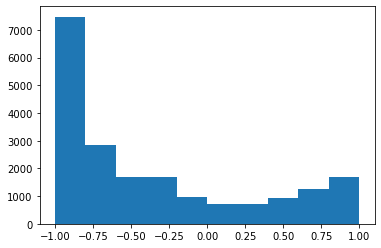

In [5]:
import matplotlib.pyplot as plt
plt.hist(y)

In [6]:
print(np.max(x, axis=0))
print(np.min(x, axis=0))
print(np.max(y))

number_of_elements       1.0
mean_atomic_mass         1.0
wtd_mean_atomic_mass     1.0
gmean_atomic_mass        1.0
wtd_gmean_atomic_mass    1.0
                        ... 
wtd_entropy_Valence      1.0
range_Valence            1.0
wtd_range_Valence        1.0
std_Valence              1.0
wtd_std_Valence          1.0
Length: 81, dtype: float64
number_of_elements      -1.0
mean_atomic_mass        -1.0
wtd_mean_atomic_mass    -1.0
gmean_atomic_mass       -1.0
wtd_gmean_atomic_mass   -1.0
                        ... 
wtd_entropy_Valence     -1.0
range_Valence           -1.0
wtd_range_Valence       -1.0
std_Valence             -1.0
wtd_std_Valence         -1.0
Length: 81, dtype: float64
1.0


In [63]:
# Split the train test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2, random_state=42)
print('num of train = {}, num of test = {}'.format(len(x_train), len(x_test)))

num of train = 15960, num of test = 3990


In [64]:
print(np.mean(y_train))
print(np.mean(y_test))
print(np.mean(y))
# print(type(x_train))
# print(np.shape(x_train))
# print(np.shape(y_train))

-0.3591829441763569
-0.35689230356990087
-0.35872481605506573


In [65]:
# Train a random forest
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=50 ,max_depth=100, random_state=0, n_jobs=10)
clf.fit(x_train, y_train)
print('training score:', clf.score(x_train, y_train))
print('testing score:', clf.score(x_test, y_test))

training score: 0.974109332391908
testing score: 0.9024865341586409


In [66]:
# Evaluate the MSE difference
test_MSE = np.mean(np.square(y_test - clf.predict(x_test)))
train_MSE = np.mean(np.square(y_train - clf.predict(x_train)))

In [67]:
print('training MSE =', train_MSE)
print('testing MSE =', test_MSE)

training MSE = 0.010568482577724908
testing MSE = 0.03972208816692161


In [68]:
# MSE for predicting the mean
print(np.mean(np.square(y_train - np.mean(y_train))))
print(np.mean(np.square(y_test - np.mean(y_test))))

0.4081966034132609
0.40734977291796753


In [76]:
# Generate random points
x_random = np.random.uniform(size=[20, 81]) * 2 - 1
# Get the prediction of these random points
y_random = clf.predict(x_random)

# Get the test set
x_test = np.random.uniform(size=[20000, 81]) * 2 - 1
# Get the prediction of these random points
y_test = clf.predict(x_test)

In [33]:
y_random = np.expand_dims(y_random, axis=1)
xy = np.concatenate([x_random, y_random], axis=1)
print(np.shape(xy))
np.save('test_data.npy', xy)

(2000, 82)


(-1.0, 1.0)

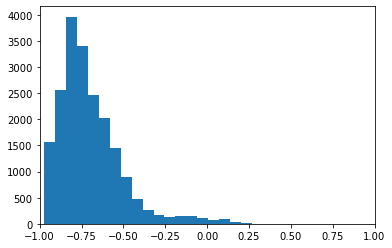

In [53]:
plt.hist(y_random, bins=20)
plt.xlim([-1, 1])

In [77]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(200, 200, 200, 200, 200), max_iter=500).fit(x_random, y_random)
# regr = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=500).fit(x_random, y_random)
# regr = MLPRegressor(hidden_layer_sizes=(200, 200, 200, 200, 200, 200),random_state=1, max_iter=500).fit(x_train, y_train)

In [78]:
print('training MSE =', np.mean(np.square(y_random - regr.predict(x_random))))
print('testing MSE =', np.mean(np.square(y_test - regr.predict(x_test))))

training MSE = 0.0003134873293732985
testing MSE = 0.03774610889620926


In [51]:
import joblib
joblib.dump(clf, "super_conductor_oracle_rf.joblib")

['super_conductor_oracle_rf.joblib']